In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1 ‐ Exploratory data analysis

In [2]:
file_path='logins.json'

with open(file_path, 'r') as file:
    data = json.load(file)

In [3]:
df = pd.DataFrame(data)
df['login_time'] = pd.to_datetime(df['login_time'])
df.set_index('login_time', inplace=True)

df.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [4]:
# check null values
print(df.isnull().sum())

# check duplicated rows
print(df.duplicated())

Series([], dtype: float64)
Series([], dtype: bool)


In [5]:
# count the number of logins per 15 mins
df_15m = df.resample('15T').size()
df_15m.head()

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
Freq: 15T, dtype: int64

In [6]:
# Convert the Series to a DataFrame
df_15m = df_15m.reset_index()

# Rename the second column to 'login_count'
df_15m.rename(columns={df_15m.columns[1]: 'login_count'}, inplace=True)

# Display the first few rows to confirm the changes
print(df_15m.head())

           login_time  login_count
0 1970-01-01 20:00:00            2
1 1970-01-01 20:15:00            6
2 1970-01-01 20:30:00            9
3 1970-01-01 20:45:00            7
4 1970-01-01 21:00:00            1


In [7]:
df_15m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9788 entries, 0 to 9787
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   login_time   9788 non-null   datetime64[ns]
 1   login_count  9788 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 153.1 KB


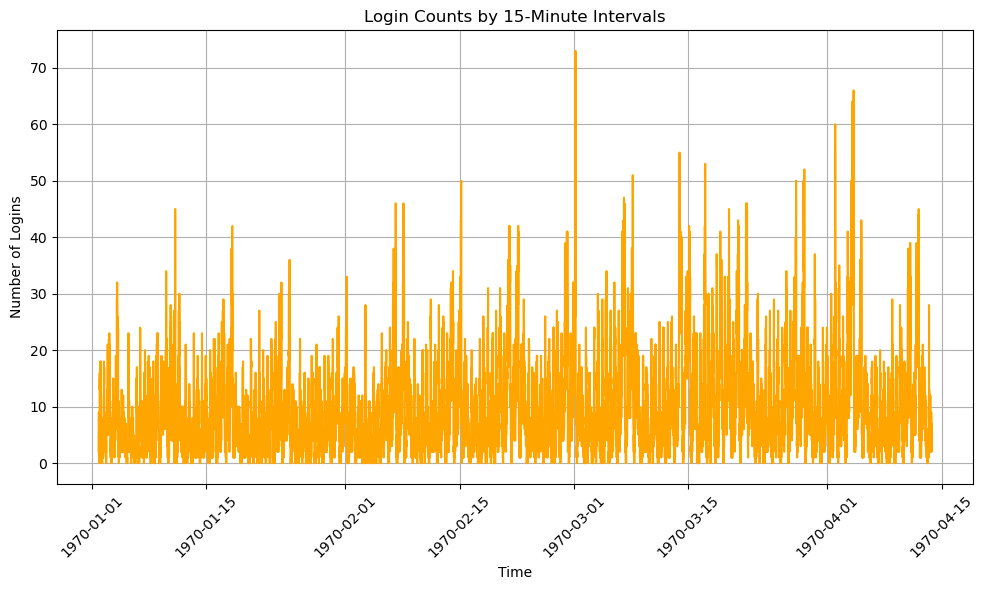

In [8]:
# plot the 15 min login counts
plt.figure(figsize=(10, 6))
plt.plot(df_15m['login_time'], df_15m['login_count'], color='orange')
plt.title('Login Counts by 15-Minute Intervals')
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

## Checking Seasonality: Time

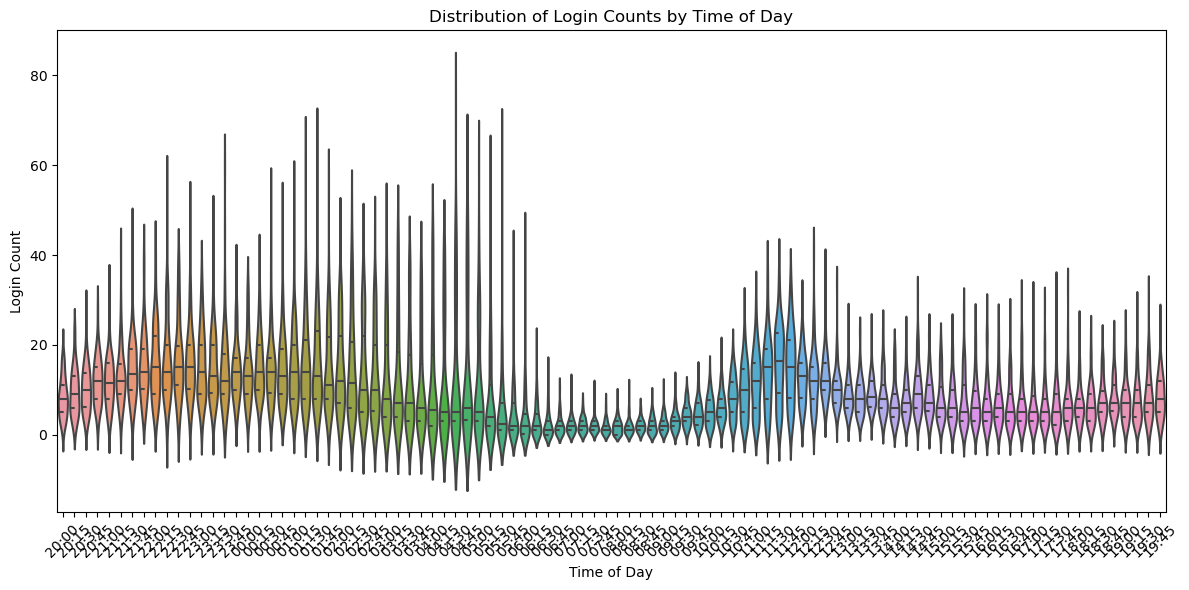

In [9]:
# Extract the time (hour and minute) and create a new column
df_15m['time'] = df_15m['login_time'].dt.strftime('%H:%M')

plt.figure(figsize=(12, 6))
sns.violinplot(x='time', y='login_count', data=df_15m, inner='quartile', scale='count')

plt.title('Distribution of Login Counts by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Login Count')

plt.xticks(rotation=45)
plt.tight_layout()

* ___The distribution of logins by time of day shows that the demand is highest between 10 PM to 1 AM and between 11 AM to 12 PM.___

## Checking Seasonality: Day

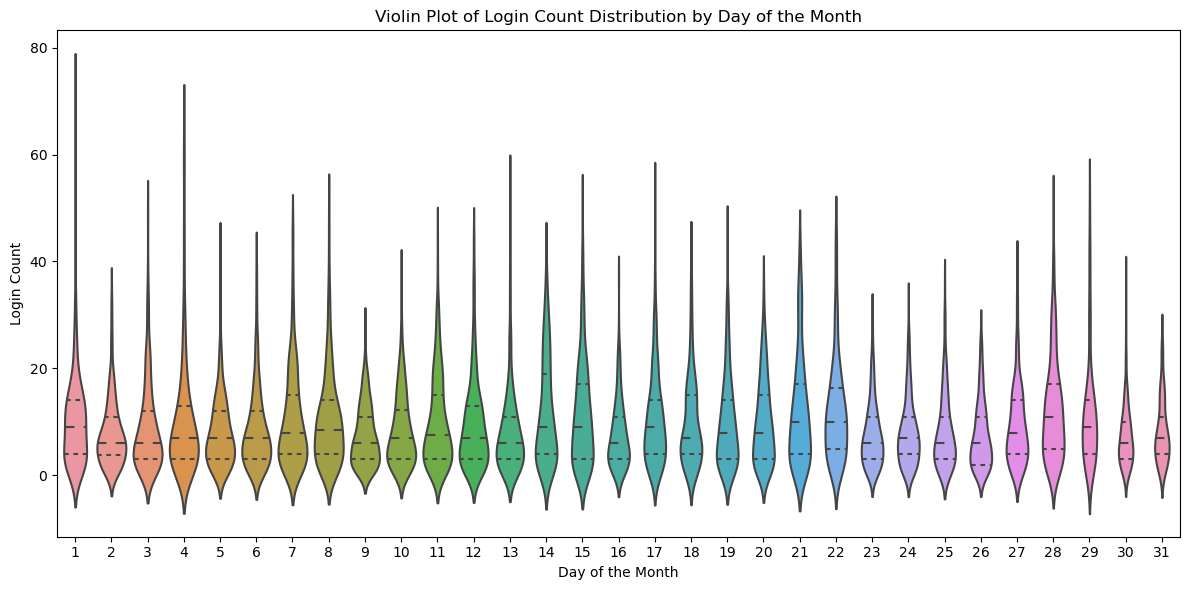

In [10]:
df_15m['day'] = df_15m['login_time'].dt.day

plt.figure(figsize=(12, 6))

sns.violinplot(x='day', y='login_count', data=df_15m, inner='quartile', scale='count')

plt.title('Violin Plot of Login Count Distribution by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Login Count')

plt.tight_layout()

* ___It seems difficult to identify any specific patterns in the daily distribution.___

## Checking Seasonality: Day of the Week

* ___I intended to analyze patterns by day of the week; however, there seems to be an issue with the data. The dates show the year as 1970, which suggests that they may have been incorrectly recorded as dates from the distant past. Therefore, it is not possible to identify patterns by day of the week.___

# Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

___A) To assess the effectiveness of the initiative aimed at encouraging driver partners to operate in both cities, I will focus on the number of active drivers in both cities during their respective peak hours. This metric could be regarded as direct indicator demonstrating whether drivers are increasing their availability due to the toll fee reimbursement. Having more drivers operating during peak hours signifies that resources are allocated more efficiently. This will reduce opportunity costs and increase utilization rates, ultimately boosting the company's revenue. Therefore, the number of drivers during each city's peak hours would serve as an appropriate metric.___

2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:<br><br>
    a) how you will implement the experiment<br><br>
        ___A) First, I will randomly select driver partners for the experiment. In the experimental Group, drivers will receive toll reimbursements, while the control Group will not. Next, I will run the experiment for a set period to gather enough data, the number of active drivers in both cities during the respective peak hours. In addition, throught the experiment. I will monitor and record any external factors that might influence the results, such as major events or weather conditions, to maintain the data's integrity.___ <br><br>
    b) what statistical test(s) you will conduct to verify the significance of the observation<br><br>
    ___A) I will excute the t-test for independent sample to compare thethe means of active drivers between the control and experiment groups during peak hours. This test will show if there's a statistically significant difference in means between the two groups.___ <br><br>
    c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.<br><br>
    ___A) If the statistical analysis shows a significant increase in the number of active drivers serving both Gotham and Metropolis during peak hours, the experiment can be considered a success, and vice versa. As for the recommendation, if it's the case of success, I will recommend continuing or expanding the toll reimbursement initiative. Additionally, I'm also using the data from the experiment to optimize allocation strategies, improving the balance of supply between the two cities. A point to note is that reimbursement costs must be considered when making decisions. Even if there was an increase in the number of drivers during peak hours and a subsequent rise in revenue after this initiative, the effect should be deemed insignificant if it does not significantly surpass the reimbursement costs.___

# Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.<br><br>
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.<br><br>
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

In [11]:
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [12]:
# import data
df = pd.read_json('ultimate_data_challenge.json')

In [13]:
# Assuming that the maximum value of last_trip_date represents the current date, create a retained column
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

date_retained = df['last_trip_date'].max() - timedelta(days=30)
df['retained'] = (df['last_trip_date'] >= date_retained).astype(int)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  retained                50000 non-null  int32 

In [15]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
retained                     0
dtype: int64

In [16]:
# fill in missing values with median
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].median(), inplace=True)
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].median(), inplace=True)

# fill in missing values of phone with 'unknown'
df['phone'].fillna('Unknown', inplace=True)

In [17]:
df.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
retained                  0
dtype: int64

In [18]:
# check duplicated rows
df.duplicated().sum()

8

In [19]:
# remove duplicated rows
df.drop_duplicates(inplace=True)
# check duplicated rows
df.duplicated().sum()

0

Percentage of users retained: 37.61%


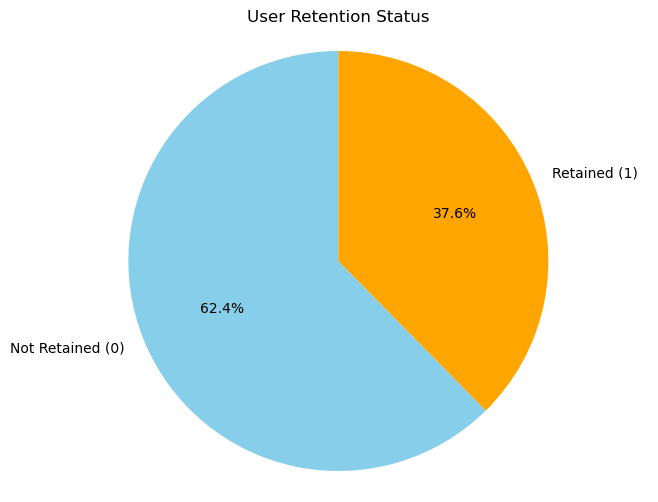

In [20]:
# Calculate retention rate
retention_fraction = df['retained'].mean()
print(f"Percentage of users retained: {retention_fraction:.2%}")

# Calculate counts of retained and not retained users
retention_counts = df['retained'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(retention_counts, labels=['Not Retained (0)', 'Retained (1)'], autopct='%1.1f%%', startangle=90, colors=['skyblue','orange'])
plt.title("User Retention Status")
plt.axis('equal')
plt.show()

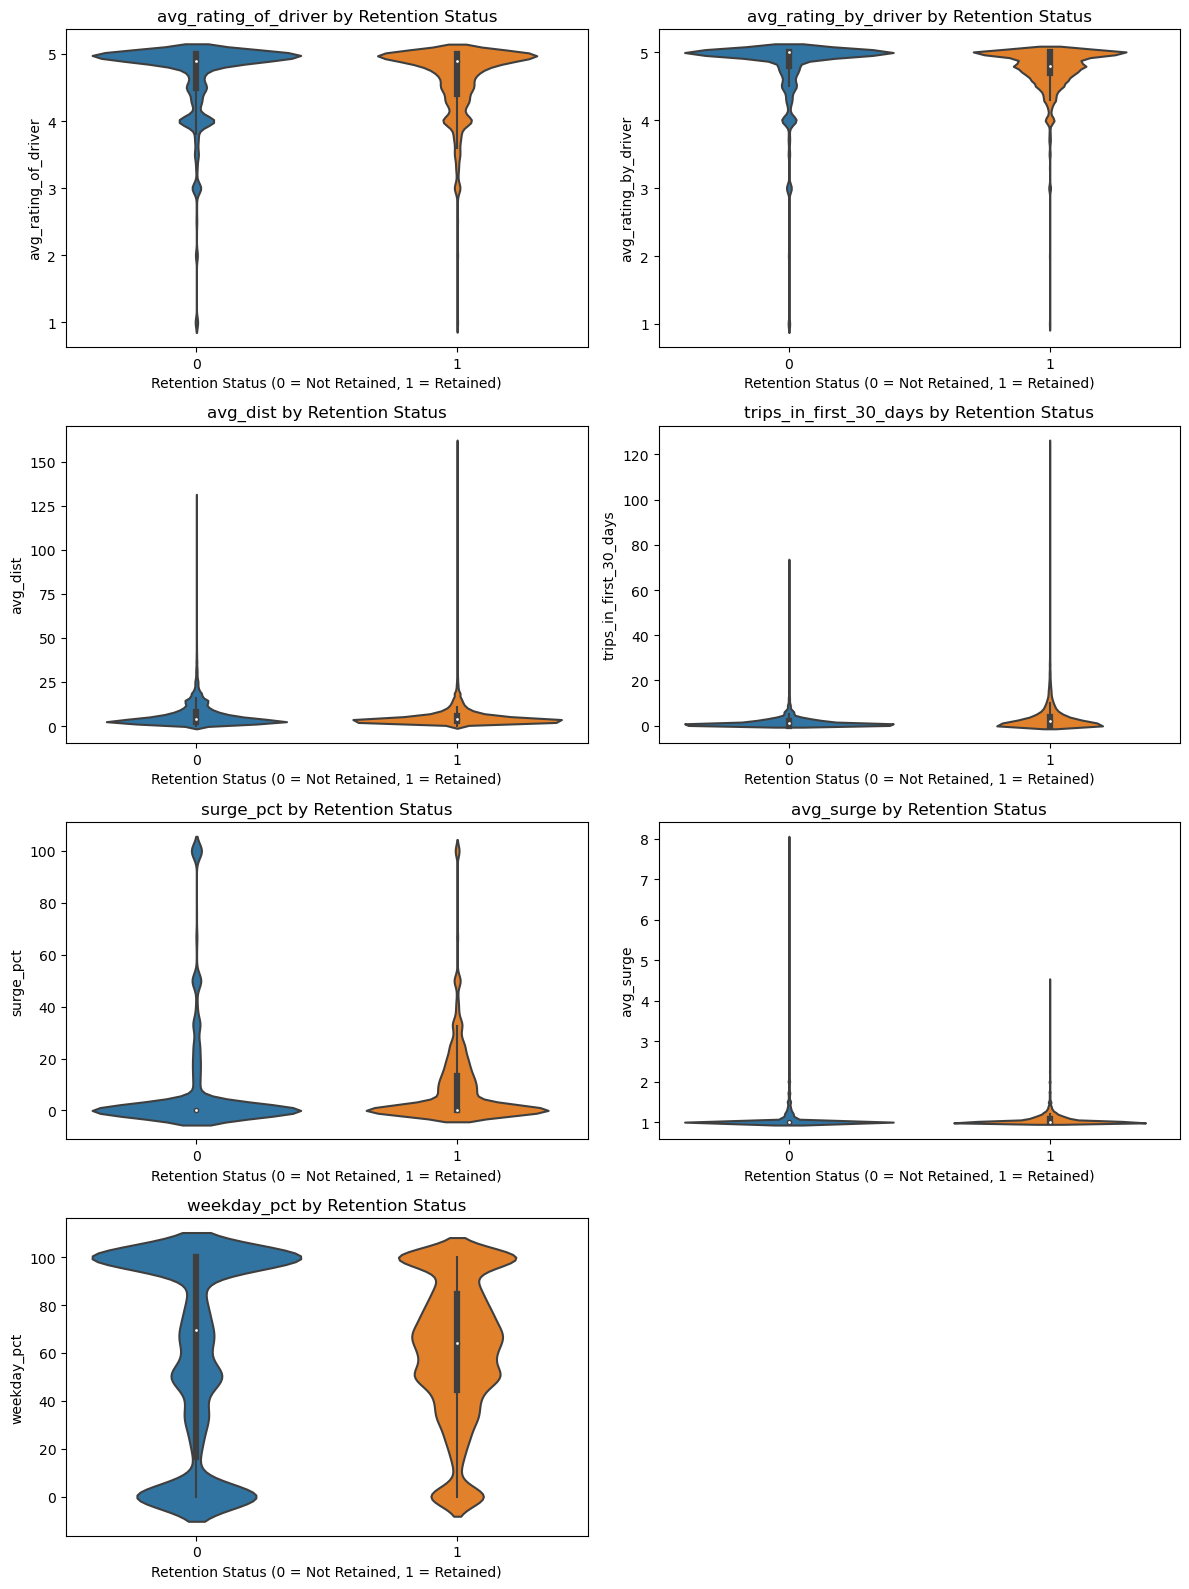

In [21]:
# Set up the figure and axes for subplots
num_vars = ['avg_rating_of_driver', 'avg_rating_by_driver', 'avg_dist', 'trips_in_first_30_days', 'surge_pct', 'avg_surge', 'weekday_pct']
n_cols = 2
n_rows = (len(num_vars) + 1) // n_cols

plt.figure(figsize=(12, n_rows * 4))

# Loop through each numeric variable to create subplots
for i, var in enumerate(num_vars):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(x='retained', y=var, data=df)
    plt.title(f"{var} by Retention Status")
    plt.xlabel("Retention Status (0 = Not Retained, 1 = Retained)")
    plt.ylabel(var)

plt.tight_layout()

Text(0.5, 1.0, 'Retention Rate by City')

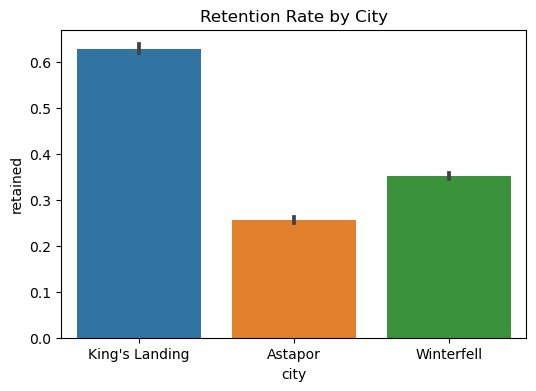

In [22]:
# Retention rate by city
plt.figure(figsize=(6, 4))
sns.barplot(x='city', y='retained', data=df)
plt.title("Retention Rate by City")

___Key Findings:___<br><br>

* __Difference in Average Distance__: There is a significant difference in the average distance per trip taken in the first 30 days between active and inactive users. This difference is crucial for predictive modeling, as it may indicate varying behaviors or preferences between the two user groups.
* __Average Rating by Driver__: Active users have a lower average rating by drivers compared to inactive users. This trend could be due to active users taking more trips, increasing the likelihood of experiences that result in ratings below 5 stars. The average rating by driver is likely to be an important feature for predictive modeling.
* __Trips in First 30 Days__: Active users took more trips in their first 30 days compared to inactive users. This observation reinforces the idea that trip frequency may be linked to user engagement and retention.
* __Average Surge Multipliter__: If the average surge is high, the likelihood of retention is low.
* __Retention by City__: There are distinct differences in retention rates by city, with Kings Landing, Winterfell, and Astapor having the highest retention rates in that order.


2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.

In [23]:
# Drop unnecessary columns for modeling
df = df.drop(columns=['signup_date', 'last_trip_date', 'phone'])

# Prepare feature matrix and target variable
X = df.drop(columns=['retained'])
y = df['retained']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encoding for categorical variables and scaling for numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['avg_dist', 'avg_rating_of_driver', 'avg_rating_by_driver', 'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']),
        ('cat', OneHotEncoder(), ['city'])
    ])

# Define classifiers, replacing SVM with LightGBM and adding Neural Network
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

# Define hyperparameter grids for each classifier
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['liblinear']
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    },
    'LightGBM': {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [-1, 10, 20],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    },
    'Neural Network': {
        'classifier__hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
        'classifier__activation': ['relu', 'tanh'],
        'classifier__alpha': [0.0001, 0.001, 0.01]  # Regularization parameter
    }
}

# Train and evaluate each classifier with hyperparameter tuning
for name, clf in classifiers.items():
    # Create a pipeline with preprocessing and model
    model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', clf)])
    
    # Perform grid search for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Best model from grid search
    best_model = grid_search.best_estimator_
    
    # Predict on test set
    y_pred = best_model.predict(X_test)
    
    # Evaluate performance
    print(f"Results for {name}:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]):.2f}")
    print(f"Best Hyperparameters: {grid_search.best_params_}\n")

Results for Logistic Regression:
[[5375  826]
 [2260 1538]]
              precision    recall  f1-score   support

           0       0.70      0.87      0.78      6201
           1       0.65      0.40      0.50      3798

    accuracy                           0.69      9999
   macro avg       0.68      0.64      0.64      9999
weighted avg       0.68      0.69      0.67      9999

ROC AUC Score: 0.71
Best Hyperparameters: {'classifier__C': 0.01, 'classifier__solver': 'liblinear'}

Results for Random Forest:
[[5234  967]
 [1308 2490]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      6201
           1       0.72      0.66      0.69      3798

    accuracy                           0.77      9999
   macro avg       0.76      0.75      0.75      9999
weighted avg       0.77      0.77      0.77      9999

ROC AUC Score: 0.84
Best Hyperparameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimat

C:\Users\james\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:20:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for XGBoost:
[[5247  954]
 [1300 2498]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      6201
           1       0.72      0.66      0.69      3798

    accuracy                           0.77      9999
   macro avg       0.76      0.75      0.76      9999
weighted avg       0.77      0.77      0.77      9999

ROC AUC Score: 0.84
Best Hyperparameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 100}

[LightGBM] [Info] Number of positive: 15006, number of negative: 24987
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 927
[LightGBM] [Info] Number of data points in the train set: 39993, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375216 -> initscore=-0.509906
[LightGBM] [Info] Start training from score -0.

__To predict user retention in the 6th month, I chose XGBoost, a Gradient Boosting Model (GBM) known for high accuracy and handling non-linear relationships, which is key for complex user engagement patterns.__

__Approach and Rationale__

* __Model Choice__: XGBoost’s flexibility and regularization help manage potential overfitting, especially in possibly imbalanced datasets like user retention.


* __Feature Engineering__: Key features included engagement metrics (e.g., trips in the first 30 days, avg_rating_by_driver, weekday_pct, and city). These were engineered to highlight patterns linked to user satisfaction and commitment, with one-hot encoding for categorical data and scaling for numeric features.

* __Evaluation Metrics__: ROC AUC was the primary metric to gauge performance across user classes, while precision and recall helped reduce the cost of false predictions, focusing more on recall to minimize underestimating inactivity.


__Alternatives Considered__

* __Logistic Regression__ provided a baseline but lacked accuracy on non-linear relationships.
* __Random Forest__ offered interpretability but required more training time without clear performance gains over XGBoost.
* __Neural Networks__ were set aside due to interpretability needs and added complexity.


__Concerns and Model Validity__
* __Overfitting__: Managed with XGBoost’s regularization and parameter tuning.
* __Imbalanced Data__: Addressed through stratified cross-validation, with potential resampling strategies for future improvement.

__Results and Validity__
The model achieved a ROC AUC score of 0.84, indicating strong performance. High importance for features like avg_rating_by_driver and trips_in_first_30_days supported the model’s validity, with high engagement linked to retention. XGBoost’s performance, interpretability, and scalability make it a suitable choice, with regular monitoring advised to adapt to evolving user behavior.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

C:\Users\james\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:28:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Text(0.5, 1.0, 'Feature Importances from XGBoost Model')

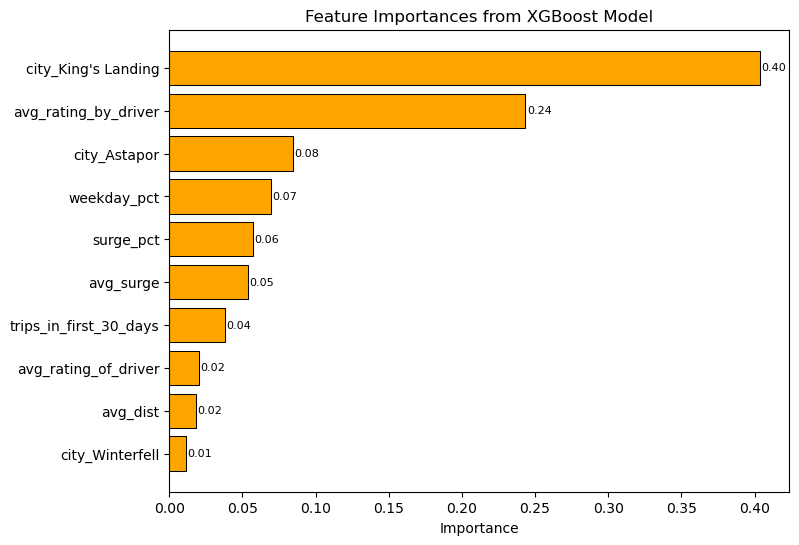

In [33]:
from xgboost import XGBClassifier

best_xgb_model = XGBClassifier(
    learning_rate=0.2,
    max_depth=5,
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='logloss'
)

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', best_xgb_model)])

model_pipeline.fit(X_train, y_train)

feature_importances = model_pipeline.named_steps['classifier'].feature_importances_

num_features = preprocessor.named_transformers_['num'].get_feature_names_out(['avg_dist', 'avg_rating_of_driver', 
    'avg_rating_by_driver', 'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct'])

cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(['city'])

all_features = list(num_features) + list(cat_features)

feature_importance_df = pd.DataFrame({'feature': all_features, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(8, 6))
bars = plt.barh(
    feature_importance_df['feature'], 
    feature_importance_df['importance'], 
    color='orange', 
    edgecolor='black', 
    linewidth=0.75
)

for bar in bars:
    plt.text(
        bar.get_width() + 0.001,  
        bar.get_y() + bar.get_height() / 2, 
        f"{bar.get_width():.2f}",  
        va='center', size=8
    )

plt.gca().invert_yaxis() 
plt.xlabel('Importance')
plt.title('Feature Importances from XGBoost Model')

Ultimate can use insights from the model to target retention strategies by ___focusing on high-impact features___. For instance, since City_King's landing has the highest influence, marketing efforts can be intensified in that area to maintain and boost engagement. With avg_rating_by_driver also showing strong importance, enhancing driver quality and satisfaction could directly improve retention. Additionally, monitoring weekday_pct patterns can help Ultimate encourage more consistent, weekday ridership among users with lower weekday engagement, potentially through targeted promotions or incentives.